# Exploratory Data Analysis

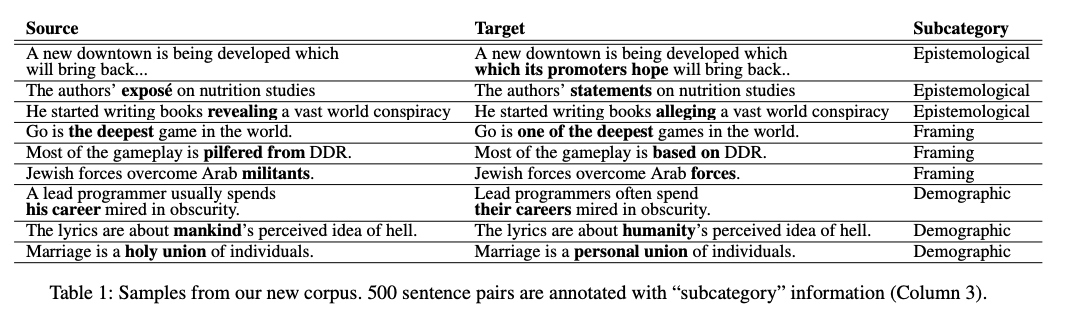

This notebook works through data collection, curation, conversion to HuggingFace Dataset object, and initial data exploration.

We will be working with the [Wiki Neutrality Corpus (WNC)](https://arxiv.org/pdf/1911.09709.pdf) - a parallel corpus of 180,000 biased and neutralized sentence pairs along with contextual sentences and metadata. The corpus was harvested from Wikipedia edits that were designed to ensure texts had a neutral point of view. WNC is the first parallel corpus of biased language.

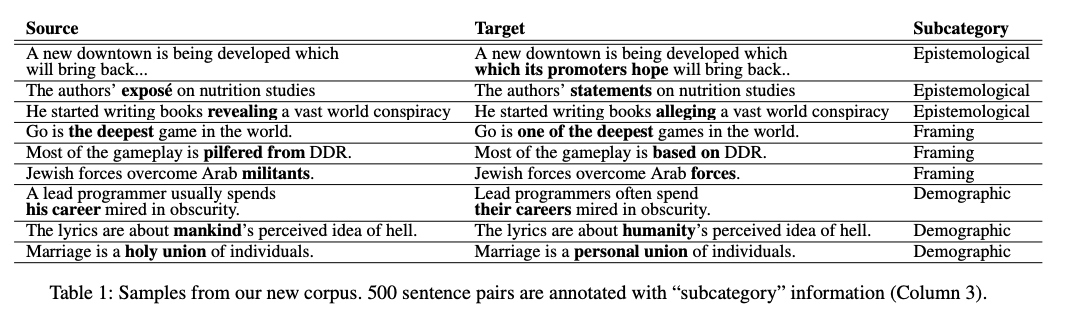

The Wiki Neutrality Corpus consists of aligned sentences pre and post-neutralization by English Wikipedia editors (Table 1). We used regular expressions to crawl 423,823 Wikipedia revisions between 2004 and 2019 where editors provided neutral point of view (NPOV)-related justification.

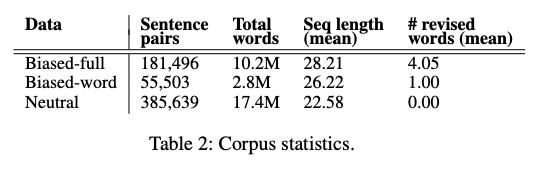

## Download Data

In [3]:
%%capture 
!pip3 install --upgrade jupyter

#!pip3 install --upgrade pip
#!pip install ipywidgets
#!jupyter nbextension enable --py widgetsnbextension --sys-prefix
#!pip install jupyterlab_widgets
#!pip install ipywidgets

In [4]:
%%capture 
from pathlib import Path
Path("/my/directory").mkdir(parents=True, exist_ok=True)!pip install -r /home/cdsw/requirements.txt

In [5]:


!mkdir -p ~/data/raw
!curl -L http://nlp.stanford.edu/projects/bias/bias_data.zip -o ~/data/raw/bias_data.zip
!unzip ~/data/raw/bias_data.zip -d ~/data/raw/

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0   318    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  104M  100  104M    0     0  44.3M      0  0:00:02  0:00:02 --:--:-- 55.4M
Archive:  /home/cdsw/data/raw/bias_data.zip
replace /home/cdsw/data/raw/bias_data/real_world_samples/news_left? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


     |████████████████████████████████| 881.9 MB 8.1 kB/s  eta 0:00:01                | 1.7 MB 13.7 MB/s eta 0:01:05:04                   | 11.8 MB 13.7 MB/s eta 0:01:04 MB 13.7 MB/s eta 0:01:04 MB 13.7 MB/s eta 0:01:03 MB 13.7 MB/s eta 0:01:03 MB 13.7 MB/s eta 0:01:031:02022929ta 0:00:29 44.6 MB 29.4 MB/s eta 0:00:29             | 46.4 MB 29.4 MB/s eta 0:00:29                         | 48.0 MB 29.4 MB/s eta 0:00:29    |█▉                              | 50.2 MB 29.4 MB/s eta 0:00:29ta 0:00:29:00:29:00:29  | 60.5 MB 29.4 MB/s eta 0:00:28MB/s eta 0:00:280:28█▌                             | 68.4 MB 29.4 MB/s eta 0:00:28:13                           | 74.8 MB 64.1 MB/s eta 0:00:1377.8 MB 64.1 MB/s eta 0:00:13██                             | 82.4 MB 64.1 MB/s eta 0:00:13                  | 84.2 MB 64.1 MB/s eta 0:00:13 MB 64.1 MB/s eta 0:00:13 MB 64.1 MB/s eta 0:00:13                   | 92.7 MB 64.1 MB/s eta 0:00:13 MB 64.1 MB/s eta 0:00:13�▌                            | 97.2 MB 64.1 MB/s 

## Inspect Data

In [4]:
from tqdm import tqdm

In [5]:
DATA_PATH = "/home/cdsw/data/raw/bias_data/WNC/biased.word.dev"

In [6]:
collect = []

for i, line in enumerate(tqdm(open(DATA_PATH))):
    parts = line.strip().split('\t')
    collect.append(parts)
    if i ==5:
        break
    

5it [00:00, 3652.30it/s]


In [7]:
for rev in collect:
    print('REV_ID: ', rev[0])
    print()
    print('PRE-TOKEN: ', rev[1])
    print('POST-TOKEN: ', rev[2])
    print()
    print('PRE: ', rev[3])
    print('POST: ', rev[4])
    print()
    print()
    print('POS: ', rev[5])
    print('RELATIONS: ', rev[6])
    print('------------------------------------------------------------------------------------------')

REV_ID:  3257810

PRE-TOKEN:  in addition to sponsoring palestinian terror attacks against israel ( often through jordanian territory , much to king hussein ' s cha ##grin ) , syria also began shell ##ing of israeli civilian communities in north - eastern galilee , from gun em ##pl ##ace ##ments on the syrian - controlled go ##lan heights .
POST-TOKEN:  in addition to sponsoring palestinian attacks against israel ( often through jordanian territory , much to king hussein ' s cha ##grin ) , syria also began shell ##ing of israeli civilian communities in north - eastern galilee , from gun em ##pl ##ace ##ments on the syrian - controlled go ##lan heights .

PRE:  in addition to sponsoring palestinian terror attacks against israel (often through jordanian territory, much to king hussein's chagrin), syria also began shelling of israeli civilian communities in north-eastern galilee, from gun emplacements on the syrian-controlled golan heights.
POST:  in addition to sponsoring palestinian att

## Let's Inspect a Pre-built seq2seq Dataset

In [9]:
from datasets import load_dataset

In [10]:
raw_datasets = load_dataset("kde4", lang1="en", lang2="fr")

Downloading:   0%|          | 0.00/1.89k [00:00<?, ?B/s]

Downloading:   0%|          | 0.00/1.42k [00:00<?, ?B/s]

Using custom data configuration en-fr-lang1=en,lang2=fr


Downloading:   0%|          | 0.00/7.05M [00:00<?, ?B/s]

0 examples [00:00, ? examples/s]

Dataset kde4 downloaded and prepared to /home/cdsw/.cache/huggingface/datasets/kde4/en-fr-lang1=en,lang2=fr/0.0.0/243129fb2398d5b0b4f7f6831ab27ad84774b7ce374cf10f60f6e1ff331648ac. Subsequent calls will reuse this data.


  0%|          | 0/1 [00:00<?, ?it/s]

In [11]:
raw_datasets['train'].features

{'id': Value(dtype='string', id=None),
 'translation': Translation(languages=('en', 'fr'), id=None)}

In [12]:
raw_datasets['train'].description

'A parallel corpus of KDE4 localization files (v.2).\n\n92 languages, 4,099 bitexts\ntotal number of files: 75,535\ntotal number of tokens: 60.75M\ntotal number of sentence fragments: 8.89M\n'

In [13]:
raw_datasets['train'].features

{'id': Value(dtype='string', id=None),
 'translation': Translation(languages=('en', 'fr'), id=None)}

In [14]:
raw_datasets['train'][17]['translation']

{'en': 'Not all languages are available from the Babelfish service.',
 'fr': 'Toutes les langues ne sont pas disponibles à partir du service Babelfish.'}

In [15]:
raw_datasets

DatasetDict({
    train: Dataset({
        features: ['id', 'translation'],
        num_rows: 210173
    })
})

In [16]:
raw_datasets["train"][18]

{'id': '18',
 'translation': {'en': "Machine translation is not a perfect science! Babelfish will at best give you a rough translation, and at worst will give you a very funny read. Do n't base important decisions on things you have read from a Babelfish translated page, without confirming that the translation is indeed accurate.",
  'fr': "La traduction automatique n'est pas une science parfaite & #160;! Babelfish vous donneras au mieux une traduction approximative et au pire un texte très drôle à lire. Ne basez pas vos décisions importantes sur des choses que vous avez lu à partir d'une page traduite par Babelfish sans avoir la confirmation que la traduction est effectivement précise."}}

## Format WNC Biased-word Data as HuggingFace Dataset

We'll start by working with the smaller "Biased-word" dataset used in the reference paper. Let's prepare the dataset by formatting it as a HuggingFace DatasetDict object.

In [17]:
%load_ext lab_black

In [18]:
import os
import torch
from collections import defaultdict
from datasets import load_dataset, Dataset, DatasetDict, Value, Translation, Features


def build_hf_dataset(path: str) -> DatasetDict:
    """
    Formats the raw biased-word data into HuggingFace DatasetDict object.

    Provided a path to the raw Wiki Neutrality Corpus (WNC) data files, this function parses
    each of the dev, test, and train sets and formats them as a HuggingFace DatasetDict object
    in the seq2seq style (i.e. ready for translation tasks).

    https://arxiv.org/pdf/1911.09709.pdf

    Args:
        path (str): path to directory containing raw WNC data files

    Returns:
        DatasetDict

    """

    splits = ["dev", "test", "train"]
    dataset_dict = defaultdict(dict)

    FEATURES = Features(
        {
            "rev_id": Value("string"),
            "translation": Translation(languages=["pre", "post"]),
        }
    )

    for split in splits:

        PATH = os.path.join(path, f"biased.word.{split}")

        rev_ids = []
        translation_pairs = []

        for i, line in enumerate(tqdm(open(PATH))):
            parts = line.strip().split("\t")

            # note some entries contain the POS and REL fields, others dont
            if len(parts) == 7:
                rev_id, pre_tok, post_tok, pre_raw, post_raw, pos, rels = parts

            elif len(parts) == 5:
                rev_id, pre_tok, post_tok, pre_raw, post_raw = parts

            else:
                print(f"Skipped entry: {i}")

            rev_ids.append(rev_id)
            translation_pairs.append({"pre": pre_raw, "post": post_raw})

        split_dict = {
            "rev_id": rev_ids,
            "translation": translation_pairs,
        }

        dataset_dict[split] = Dataset.from_dict(split_dict, features=FEATURES)

    return DatasetDict(dataset_dict)

In [19]:
DATA_PATH = "/home/cdsw/data/raw/bias_data/WNC"

wnc_datasets = build_hf_dataset(DATA_PATH)

700it [00:00, 65133.28it/s]
1000it [00:00, 88427.73it/s]
53803it [00:00, 98974.86it/s] 


In [20]:
wnc_datasets

DatasetDict({
    dev: Dataset({
        features: ['rev_id', 'translation'],
        num_rows: 700
    })
    test: Dataset({
        features: ['rev_id', 'translation'],
        num_rows: 1000
    })
    train: Dataset({
        features: ['rev_id', 'translation'],
        num_rows: 53803
    })
})

## EDA on WNC Biased-Word Datasets

EDA:
- Analyze random samples and draw observations
- Check for duplicates by `rev_id` and by actual text of pre/post within and across each dataset split
- Descriptive statistics on each dataset's text pre and post
- For each revision, extract out the word/words that were changed in pre-text AND also extract out the result of that change in the post-text. From this we can look at frequencies to understand if there are common words or phrases that are changed/edited/deleted. (https://towardsdatascience.com/side-by-side-comparison-of-strings-in-python-b9491ac858)
  - also could look at how those target words are distributed by part-of-speech

THEN:
- spend time deeply understanding what the NPOV rules are and summarize them for ourselves

### 1. Manually inspect & analyze some random samples

In [21]:
random_sample = wnc_datasets["train"].shuffle(seed=42).select(range(25))

In [22]:
import pandas as pd


def inspect_df(wnc_dataset_df: pd.DataFrame):

    for rev_id in set(wnc_dataset_df["rev_id"]):
        print(rev_id)
        print()
        temp_df = wnc_dataset_df[
            wnc_dataset_df.rev_id == str(rev_id)
        ]  ## this is for duplicate inspection later on
        for i, row in temp_df.iterrows():
            print(i)
            print(row["translation"]["pre"])
            print(row["translation"]["post"])
            print()

        print("-------------------------------")
        print()

**Observations:**
- Many of these examples do indeed reduce subjectivity: 856833678, 854195033, 879288389, 86379285, 255371998, 464589189
  - It seems these examples largely focus on changing or removing an adjective/adverb to "tone it down a bit"... which could likely be accomplished with some sophisticated rules and lexicon curations..
 
- Some of these seem non-NPOV related, meaning the dataset creators may not have high precision on isolating NPOV only edits: 823894954, 


In [23]:
inspect_df(random_sample.to_pandas())

464589189

11
philip david ochs (; december 19, 1940 april 9, 1976) was an american protest singer (or, as he preferred, a topical singer) and songwriter who was known for his sharp wit, sardonic humor, earnest humanism, political activism, insightful and alliterative lyrics, and haunting voice.
philip david ochs (; december 19, 1940 april 9, 1976) was an american protest singer (or, as he preferred, a topical singer) and songwriter who was known for his sharp wit, sardonic humor, earnest humanism, political activism, insightful and alliterative lyrics, and distinctive voice.

-------------------------------

255371998

13
it takes approximately four years for an apprentice to complete his on-the-job training and schooling.
it takes approximately four years for an apprentice to complete on-the-job training and schooling.

-------------------------------

852305971

24
on january 2, 2016, armed militants seized the headquarters of the malheur national wildlife refuge in harney county, o

### 2. Check for duplicates in and across dataset splits

In [24]:
from functools import reduce
from operator import concat

#### a. Duplicate `rev_id`'s?

In [25]:
rev_ids = reduce(
    concat, [wnc_datasets[split]["rev_id"] for split in wnc_datasets.keys()]
)

print(f"Looks like there are {len(rev_ids) - len(set(rev_ids))} duplicates")

Looks like there are 6 duplicates


In [26]:
%%time

duplicate_revids = set([rev_id for rev_id in rev_ids if rev_ids.count(rev_id) > 1])

CPU times: user 55.8 s, sys: 0 ns, total: 55.8 s
Wall time: 55.8 s


In [27]:
duplicate_dataset = wnc_datasets.filter(lambda x: x["rev_id"] in duplicate_revids)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/54 [00:00<?, ?ba/s]

**Looks like all the duplicates are in the train set**

In [24]:
duplicate_dataset["train"].to_pandas().sort_values("rev_id")

,rev_id,translation
2,170782428,{'post': 'to complete the lineup on their firs...
11,170782428,{'post': 'full of the brothers' pop culture ob...
1,232695029,{'post': 'the armstrongs and fine served jail ...
5,232695029,{'post': 'investigators believe that four peop...
0,241894774,"{'post': 'in addition, they all famously wear ..."
8,241894774,{'post': 'they also report abstaing from alcoh...
6,243772559,{'post': 'pettitte ended up getting the victor...
10,243772559,"{'post': 'he recorded his 2, 000th career stri..."
3,649752518,{'post': 'madeleine buckingham has served as c...
4,649752518,{'post': 'mother jones (abbreviated mojo) is a...


In [25]:
duplicates_df = duplicate_dataset["train"].to_pandas()

inspect_df(duplicates_df)

241894774

0
in addition, they all famously wear purity rings on their left-hand ring finger and have vowed not to have premarital sex, which russell brand made fun of during the mtv video music awards, although he later apologised for his negative comments.
in addition, they all famously wear purity rings on their left-hand ring finger and have vowed not to have premarital sex, which russell brand made fun of during the mtv video music awards, although he later apologised for his cynical comments.

8
they also abstain from alcohol, tobacco, and drugs.
they also report abstaing from alcohol, tobacco, and drugs.

-------------------------------

674355053

7
experts in branding and marketing, such as wendy clark of coca cola, and roy spence of gsd&m, have been brought into the campaign to assist with "re-branding" clinton.
professionals in branding and marketing, such as wendy clark of coca cola, and roy spence of gsd&m, have been brought into the campaign to assist with "re-branding" c

**Observations:**
- There appears to be no actual duplication of content here, other than just the revision ID's themselves.
- However, some of these examples do appear to have corrections that are non-NPOV related. For example, 232695029 - 5 introduces a spelling correction in a persons name. Or 243772559 - 10 that has a grammer correction.

**Action:**
- Let's just drop all of these examples from consideration as there are relatively few - right?

#### b. Duplicate `translation`'s?

In [26]:
translations = reduce(
    concat, [wnc_datasets[split]["translation"] for split in wnc_datasets.keys()]
)
translations = [
    tuple(translation.items()) for translation in translations
]  # make tuples so hashable

print(f"Looks like there are {len(translations) - len(set(translations))} duplicates")

Looks like there are 0 duplicates


### 3. Descriptive statistics on pre/post text across splits

In [27]:
import seaborn as sns

sns.set_theme()

#### a. Distribution of text by number of words

In [28]:
# create new dataset with calculated column lengths
wnc_data_mod = wnc_datasets.map(
    lambda example: {
        "length_pre": len(example["translation"]["pre"].split()),
        "length_post": len(example["translation"]["post"].split()),
    }
)

0ex [00:00, ?ex/s]

0ex [00:00, ?ex/s]

0ex [00:00, ?ex/s]

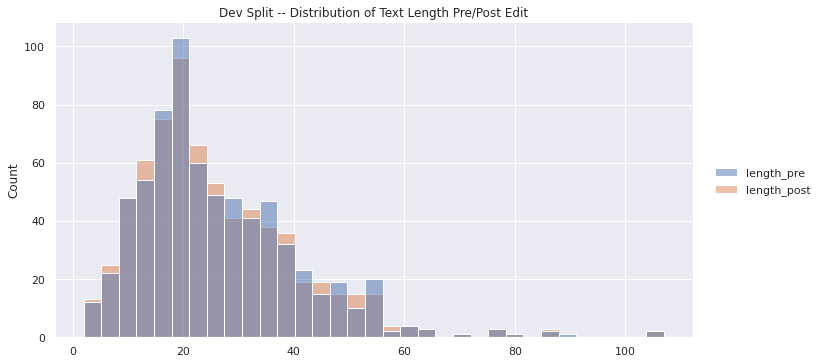

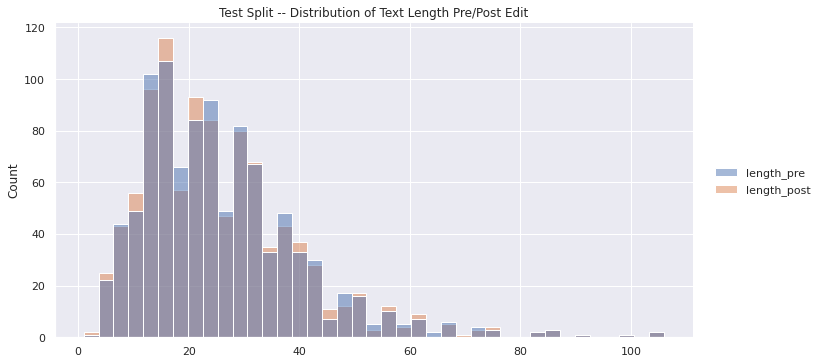

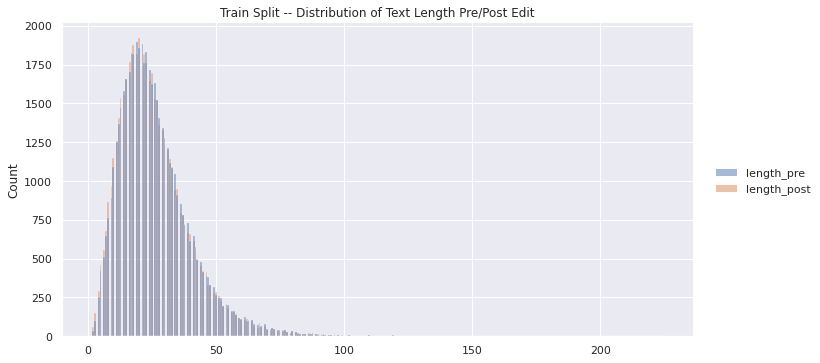

In [29]:
for split in wnc_data_mod.keys():
    test_df = wnc_data_mod[split].to_pandas()
    sns.displot(test_df[["length_pre", "length_post"]], kind="hist", aspect=2).set(
        title=f"{split.capitalize()} Split -- Distribution of Text Length Pre/Post Edit"
    )

In [30]:
# collect descriptive statistics for each split
stats = {}
for split in wnc_data_mod.keys():
    test_df = wnc_data_mod[split].to_pandas()
    stat = test_df[["length_pre", "length_post"]].describe().round(2)
    stats[split] = stat

# format as dataframe
pd.concat(stats).unstack(0).swaplevel(0, 1, axis=1).sort_index(axis=1)

dev                   test                  train           
      length_post length_pre length_post length_pre length_post length_pre
count      700.00     700.00     1000.00    1000.00    53803.00   53803.00
mean        26.07      26.32       25.70      25.97       26.08      26.38
std         14.62      14.54       14.65      14.62       14.55      14.51
min          2.00       2.00        1.00       2.00        1.00       2.00
25%         16.00      16.00       15.00      16.00       16.00      16.00
50%         23.00      23.00       23.00      23.00       23.00      24.00
75%         34.00      34.00       33.00      33.00       33.00      33.00
max        107.00     107.00      105.00     106.00      225.00     225.00

**Observations:**
- Distribution of text length across splits (dev, test, train) is very similar, even with drastically different sample sizes -- which is good
- Mean text length decreases after revision edits -- which suggests many of these edits are subtractive in nature
- Statistics are consistent with whats reported in the paper
- Min / Max sentence length could pose a concern

**Actions:**
- How long of an input can BERT take?
- Might need to remove outliers: above 100 words and below 3 words?

#### b. Distribution of text by change in number of words

aka - what proportion of edits were additive, subtractive, or net-even (by split)... aka did the edit introduce more words?

In [31]:
# calculate the change in text length after making revision
wnc_data_mod = wnc_data_mod.map(
    lambda example: {"delta": example["length_post"] - example["length_pre"]}
)

0ex [00:00, ?ex/s]

0ex [00:00, ?ex/s]

0ex [00:00, ?ex/s]

In [32]:
# aggregate number of revision by the change in length
deltas = {}
for split in wnc_data_mod.keys():
    delta = (
        wnc_data_mod[split].to_pandas()[["rev_id", "delta"]].groupby("delta").count()
    )
    deltas[split] = delta

# format for plotting
delta_df = pd.concat(deltas).unstack(0).droplevel(0, axis=1).fillna(0)

for col in delta_df.columns:
    delta_df[col] = delta_df[col] / delta_df[col].sum()

<AxesSubplot:title={'center':'Percentage of Edits by Change in Word Count (by Split)'}, xlabel='delta'>

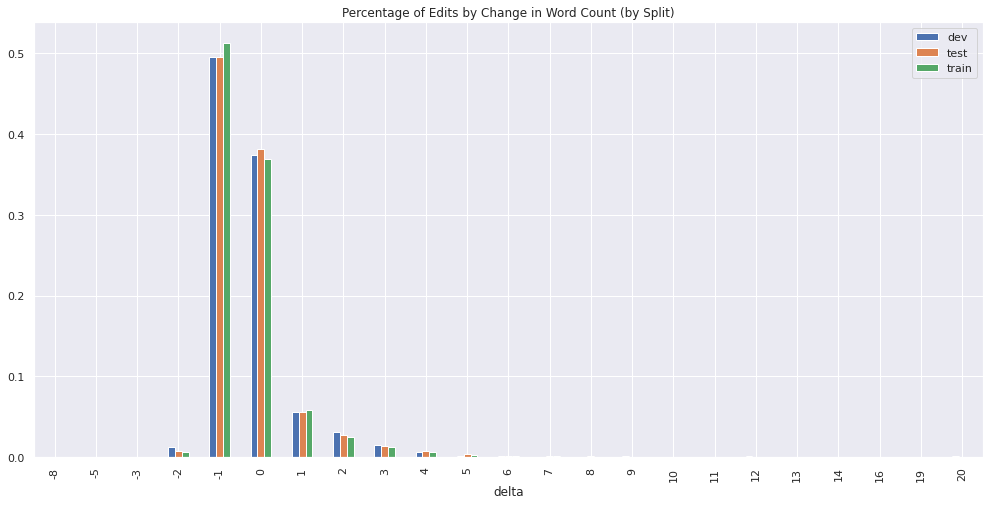

In [33]:
delta_df.plot.bar(
    title="Percentage of Edits by Change in Word Count (by Split)", figsize=(17, 8)
)

**Observations:**
- The vast majority of edits (~50%) removed 1 word from the original. This indicates most edits are subtractive in nature, which backs up the manual observation I had where it seems like subjective adjectives/adverbs are simply being dropped to lighten the tone.
    - This suggests that rather than actually "generating new text", you could simply build a model to predict if a given word (likely adjective/adverb) in the sentence is "subjective" and then simply remove it and achieve ~50% accuracy on this specific task...
- ~38% of all edits resulted in a net-even sentence length. This indicates a huge chunk just directly replace a given word.
- ~10% (categories 1 --> 5) of edits introduces several more words than were there prior.
- In some rare cases, up to 20 words were added. And in others up to 8 words were taken away.... these need to be investigated further as they don't seem right. Especially the subtractive b/c dataset is suppose to be 1 word only changes. 

In [34]:
delta_df

,dev,test,train
delta,,,
-8,0.000000,0.000,0.000019
-5,0.000000,0.000,0.000019
-3,0.000000,0.000,0.000019
-2,0.012857,0.008,0.007137
-1,0.495714,0.495,0.512518
0,0.374286,0.382,0.369738
1,0.055714,0.056,0.058231
2,0.031429,0.028,0.025668
3,0.015714,0.014,0.012564


In [35]:
rare_subtractive = wnc_data_mod.filter(lambda example: example["delta"] in [-8, -5])

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/54 [00:00<?, ?ba/s]

#### Investigate rare subtractive 

In [36]:
rare_subtractive["train"][0]

{'rev_id': '265019166',
 'translation': {'post': 'recent acceptances from universities such as cornell, columbia, william and mary, duke, davidson college, georgetown, smith, and washington and lee reveal a chatham hall girl is intelligent, driven, and loyal.',
  'pre': 'recent acceptances from universities such as cornell , columbia , william and mary , duke university , davidson college , georgetown , smith , and washington and lee reveal a chatham hall girl is intelligent, driven, and loyal.'},
 'length_pre': 38,
 'length_post': 30,
 'delta': -8}

In [37]:
rare_subtractive["train"][1]

{'rev_id': '250989745',
 'translation': {'post': 'during the conference "the collapse of europe" at pepperdine university, ayaan hirsi ali asked for "reform, meaning, to reduce government, where government is unnecessary, and especially the welfare state."',
  'pre': 'during the conference "the collapse of europe" at pepperdine university, ayaan hirsi ali asked for " economic reform , meaning, to reduce government , where government is unnecessary , and especially the welfare state."'},
 'length_pre': 34,
 'length_post': 29,
 'delta': -5}

**Action:**
- These cases seem to just be removing extra spaces... my naive tokenization on " " is treating them as words.
- So really these types of edit should be removed

#### Investigate rare additive 

In [38]:
rare_additive = wnc_data_mod.filter(
    lambda example: example["delta"] in [14, 16, 19, 20]
)

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/1 [00:00<?, ?ba/s]

  0%|          | 0/54 [00:00<?, ?ba/s]

In [39]:
rare_additive["train"][0]

{'rev_id': '804347184',
 'translation': {'post': 'elaine donnelly of the center for military readiness (cmr) , a group which seeks to limit the roles of women in the military, suggested that hultgreen "may have been the victim of a flawed policy", which overlooked her mistakes in training, two of which were similar to those that caused her death.',
  'pre': 'elaine donnelly of the center for military readiness (cmr) suggests that hultgreen "may have been the victim of a flawed policy", which overlooked her mistakes in training, two of which were similar to those that caused her death.'},
 'length_pre': 38,
 'length_post': 52,
 'delta': 14}

In [40]:
rare_additive["train"][1]

{'rev_id': '741021765',
 'translation': {'post': 'ngo monitor , an ngo based in jerusalem that analyzes activities of the international ngo community from a pro-israel perspective, has claimed that soros is part of the movement to delegitimize israel, claiming: the evidence demonstrates that open society funding contributes significantly to anti-israel campaigns in three important respects: 1. active in the durban strategy; 2. funding aimed at weakening u.s.support for israel by shifting public opinion regarding the israeli-palestinian conflict and iran; 3. funding for israeli political opposition groups on the fringes of israeli society, which use the rhetoric of human rights to advocate for marginal political goals.',
  'pre': 'ngo monitor argues that soros is part of the movement to delegitimize israel, claiming: the evidence demonstrates that open society funding contributes significantly to anti-israel campaigns in three important respects: 1. active in the durban strategy; 2. fun

**Action:**
- These rare additive examples seem to be of non-NPOV substance. In both of the above cases where 14 and 19 words are added, they are edits that add descriptive context an entity in the sentence: the CMR or NGO Monitor
- These types of edits should be removed

### 4. Analyze revision diffs

For each revision, extract out the word/words that were changed in pre-text AND also extract out the result of that change in the post-text. From this we can look at frequencies to understand if there are common words or phrases that are changed/edited/deleted

In [41]:
import difflib

In [42]:
def get_diff(s1, s2):
    """
    Use difflab's SequenceMatcher to extract deleted / replaced tokens between two
    input sentences.

    Note - tokenization is naive, splitting on spaces alone

    """

    s1 = s1.split()
    s2 = s2.split()

    deleted = []
    replaced = []

    matcher = difflib.SequenceMatcher(a=s1, b=s2)

    for tag, i1, i2, j1, j2 in matcher.get_opcodes():
        if tag == "delete":
            deleted.append(" ".join((s1[i1:i2])))
        if tag == "replace":
            replaced.append((" ".join(s1[i1:i2]), " ".join(s2[j1:j2])))

    return {"deleted": deleted, "replaced": replaced}


def apply_diff(example):

    example.update(
        get_diff(s1=example["translation"]["pre"], s2=example["translation"]["post"])
    )
    return example

In [43]:
s1 = "This is a good sentence before."
s2 = "This is a sentence after."

get_diff(s1, s2)

{'deleted': ['good'], 'replaced': [('before.', 'after.')]}

In [44]:
for i, row in random_sample.to_pandas().iterrows():
    print("PRE: ", row["translation"]["pre"])
    print("POST: ", row["translation"]["post"])

    print(get_diff(s1=row["translation"]["pre"], s2=row["translation"]["post"]))
    print()
    print("------------------------------")

PRE:  gender-neutral pronouns used in ancient english
POST:  gender-neutral pronouns used in middle english
{'deleted': [], 'replaced': [('ancient', 'middle')]}

------------------------------
PRE:  based on the motorola 68k series of microprocessors, the machine sported a custom chipset with advanced graphics and sound capabilities, and a sophisticated pre-emptive multitasking operating system (now known as amigaos).
POST:  based on the motorola 68k series of microprocessors, the machine sported a custom chipset with advanced graphics and sound capabilities, and a pre-emptive multitasking operating system (now known as amigaos).
{'deleted': ['sophisticated'], 'replaced': []}

------------------------------
PRE:  horney distorted these needs somewhat to correspond with what she believed were individuals' neuroses.
POST:  horney modified these needs somewhat to correspond with what she believed were individuals' neuroses.
{'deleted': [], 'replaced': [('distorted', 'modified')]}

-------

In [45]:
# create new columns for revisons
wnc_data_mod = wnc_data_mod.map(apply_diff)

0ex [00:00, ?ex/s]

0ex [00:00, ?ex/s]

0ex [00:00, ?ex/s]

#### a. How many deletions vs. replacements?

In [46]:
def revision_type(example):
    """
    Add column to quantify revision type
    """

    if len(example["deleted"]) >= 1 and len(example["replaced"]) >= 1:
        rtype = "both"
    elif len(example["deleted"]) >= 1:
        rtype = "deleted"
    elif len(example["replaced"]) >= 1:
        rtype = "replaced"
    else:
        rtype = "none"

    example["revision_type"] = rtype

    return example

In [47]:
# create new column for revision type
wnc_data_mod = wnc_data_mod.map(revision_type)

0ex [00:00, ?ex/s]

0ex [00:00, ?ex/s]

0ex [00:00, ?ex/s]

In [48]:
# aggregate by type of revision
rev_types = {}

for split in wnc_data_mod.keys():
    rev_type = (
        wnc_data_mod[split]
        .to_pandas()[["rev_id", "revision_type"]]
        .groupby("revision_type")
        .count()
    )
    rev_types[split] = rev_type

In [49]:
pd.concat(rev_types).unstack(0).droplevel(0, axis=1)

,dev,test,train
revision_type,,,
both,2.0,NaN,233.0
deleted,345.0,495.0,27495.0
none,NaN,NaN,2.0
replaced,353.0,505.0,26073.0


**Observations:**
- Looks like its pretty even between revisions that are deletions vs. replacements.
- Oddly there are some with both or none... these should be looked into closer

#### b. Commonly deleted words

In [50]:
deleted = []

for split in wnc_data_mod.keys():
    deleted.extend(
        [term[0] for term in wnc_data_mod[split].to_pandas().deleted if len(term) != 0]
    )

deleted_term_counts = pd.DataFrame(
    pd.Series(deleted).value_counts().sort_values(ascending=False)
)

<AxesSubplot:title={'center':'Most Commonly Deleted Terms'}>

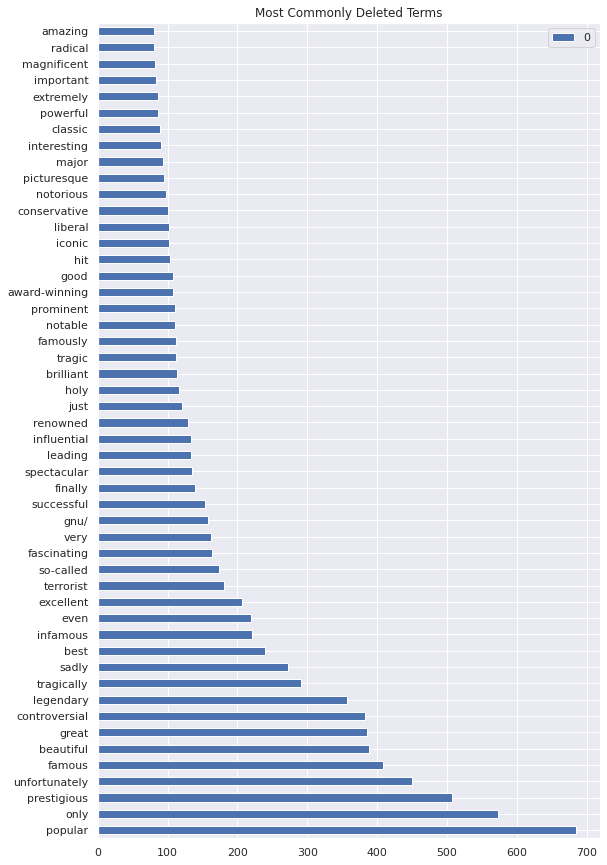

In [51]:
deleted_term_counts[:50].plot(
    kind="barh", figsize=(9, 15), title="Most Commonly Deleted Terms"
)

#### c. Commonly replaced words

In [52]:
replaced = []

for split in wnc_data_mod.keys():
    replaced.extend(
        [
            term[0][0]
            for term in wnc_data_mod[split].to_pandas().replaced
            if len(term) != 0
        ]
    )

replaced_term_counts = pd.DataFrame(
    pd.Series(replaced).value_counts().sort_values(ascending=False)
)

<AxesSubplot:title={'center':'Most Commonly Replaced Terms'}>

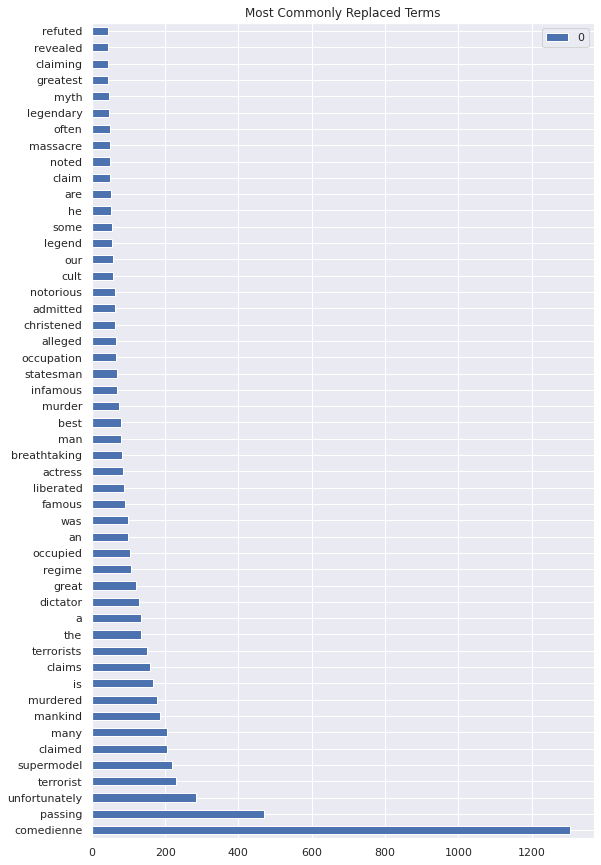

In [53]:
replaced_term_counts[:50].plot(
    kind="barh", figsize=(9, 15), title="Most Commonly Replaced Terms"
)

#### d. Commonly replaced target words

In [54]:
replaced_target = []

for split in wnc_data_mod.keys():
    replaced_target.extend(
        [
            term[0][1]
            for term in wnc_data_mod[split].to_pandas().replaced
            if len(term) != 0
        ]
    )

replaced_target_term_counts = pd.DataFrame(
    pd.Series(replaced_target).value_counts().sort_values(ascending=False)
)

<AxesSubplot:title={'center':'Most Commonly Replaced Target Terms'}>

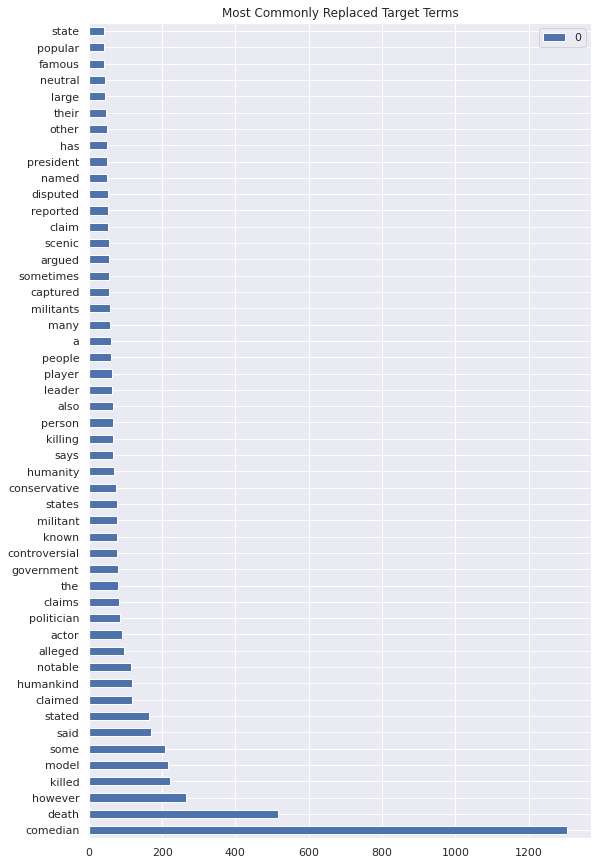

In [55]:
replaced_target_term_counts[:50].plot(
    kind="barh", figsize=(9, 15), title="Most Commonly Replaced Target Terms"
)

#### e. Commonly replaced pairs

In [67]:
replaced_pair = []

for split in wnc_data_mod.keys():
    replaced_pair.extend(
        [
            tuple(term[0])
            for term in wnc_data_mod[split].to_pandas().replaced
            if len(term) != 0
        ]
    )

In [70]:
%%time

replaced_pair_term_counts = pd.DataFrame(
    pd.Series(replaced_pair).value_counts()
)

CPU times: user 29.3 ms, sys: 2.65 ms, total: 32 ms
Wall time: 30.3 ms


<AxesSubplot:title={'center':'Most Commonly Replaced Pairs'}>

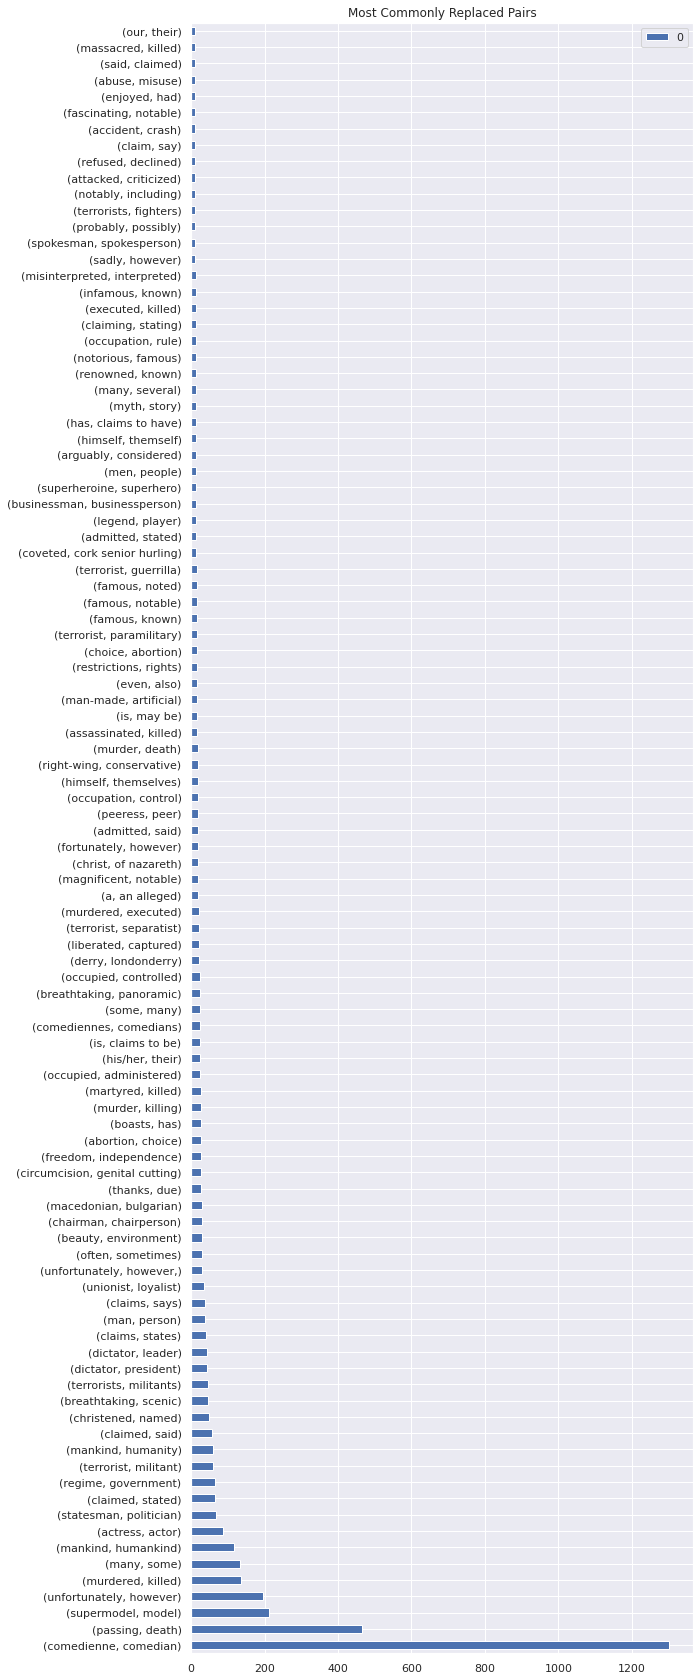

In [73]:
replaced_pair_term_counts[:100].plot(
    kind="barh", figsize=(9, 30), title="Most Commonly Replaced Pairs"
)

**Observations:**
- selection bias seems to be strong here... what were the topics/categories that these articles were pulled from? For example:
  - commedienne --> comedian
  - macedonian --> bulgarian
  - supermodel --> model

**Idea:**
- New evaluation criteria we could look into: since this type of style transfer is largely about replacement of subjective words/phrasese to objective ones --> we could have a metric that checks: "did the subjective part of the sentence get altered?"
- Basically, did the right words get targeted for replacement?

## Next Steps

From all the information gathered here, let's preprocess the raw dataset to:
1. remove duplicate records
2. remove records where the pre or post revision text is >100(?) tokens or <3 tokens
3. remove rare subtractive records (those where lots of spaces were removed as thats non-NPOV)
4. remove rare additive records (those where additional context was actually added as thats also non-NPOV)